In [1]:
import konlpy
import pandas as pd
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("dataset.csv")
df.head(10)

Unnamed: 0 image_name                                          image_url  \
0           0   일상_0.jpg  https://scontent-ssn1-1.cdninstagram.com/v/t51...   
1           1   일상_1.jpg  https://scontent-ssn1-1.cdninstagram.com/v/t51...   
2           2   일상_2.jpg  https://scontent-ssn1-1.cdninstagram.com/v/t51...   
3           3   일상_3.jpg  https://scontent-ssn1-1.cdninstagram.com/v/t51...   
4           4   일상_4.jpg  https://scontent-ssn1-1.cdninstagram.com/v/t51...   
5           5   일상_5.jpg  https://scontent-ssn1-1.cdninstagram.com/v/t51...   
6           6   일상_6.jpg  https://scontent-ssn1-1.cdninstagram.com/v/t51...   
7           7   일상_7.jpg  https://scontent-ssn1-1.cdninstagram.com/v/t51...   
8           8   일상_8.jpg  https://scontent-ssn1-1.cdninstagram.com/v/t51...   
9           9   일상_9.jpg  https://scontent-ssn1-1.cdninstagram.com/v/t51...   

                                             content                location  \
0                                      날씨 너무 죠타🌸🌼🌸🌼🍃    Gwangju, South Korea   
1  날씨 좋은 월요일 맛점💕\n\n⠀\n⠀\n⠀\n⠀\n⠀\n⠀\n⠀\n⠀\n⠀\n#월...              슈엘뷰티샵&아카데미   
2     곧 5️⃣년 된다는 사실에 놀라고 졸업👩🏻‍🎓이라는 사실에 한번 더 놀라고 .. 🤭             Naive Place   
3                           나 뭐가 달라진 거 같아~~~~??????😁                  Jeonju   
4  ♥\n\n요즘 공기 봄 냄새나는거같아서 좋다☺️\n쌩얼인데 어쩌라고\n\n#광주속눈...                     매곡동   
5                             95 아니고 65 갬성\n#레트로 #포즈                   법기수원지   
6  옷 주섬.....\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\...  스페이스앤무드 - Space & Mood   
7                                         내 주말 돌려줘..                  대천해수욕장   
8                                  이 시간까지 늦잠 너무 죠하♥️                     NaN   
9  바람한테 싸맞아따,,그래도 오랜만에 본 바다는 너무너무너무너무 이뻤ㄷ ㅏ🌊\n.\n...     Gyungpo Beach, 경포해변   

                                            hashtags  
0  #광주#일상#일상스타그램#데일리룩#데일리#daily#dailylook#소통#소통해요...  
1  #월요일#출근#뷰티샵#대구토탈뷰티샵#대구속눈썹#대구왁싱#슈엘뷰티#사진맛집#여행#핫플...  
2  #광주#동명동#양림동#충장로#조대#조대후문#수완지구#상무지구#서울#부산#전주#셀피#...  
3  #맞팔#팔로우#팔로워#셀카#인스타#셀피#일상#데일리#좋아요반사#좋아요#커피#오오티디...  
4  #광주속눈썹연장#속눈썹연장잘하는곳#뷰티어스#뷰티어스래쉬#속눈썹연장#일상#출근#셀카#...  
5  #레트로#포즈#인스타그램#셀스타그램#여행스타그램#일상#소통#인친#선팔하면맞팔#구시청...  
6  #20#서면#예승이#항공과#여행스타그램#스무살#첫줄#첫줄반사#데일리#맞팔환영#운동#...  
7  #전주#첫줄#객리단길#좋반#일상#선팔#맞팔#좋아요#셀카#셀피#전주카페#선팔환영#카페...  
8  #셀스타그램#얼스타그램#좋반#오오티디#셀카#셀피#데일리#데일리그램#팔로우#좋아요#인...  
9  #강릉여행#우정여행#경포해변#바람#때문에#어렵게#건진#사진들#스무살#20#선팔#맞팔...

In [38]:
hashtags = df['hashtags']
hashtags[:10]

0    #광주#일상#일상스타그램#데일리룩#데일리#daily#dailylook#소통#소통해요...
1    #월요일#출근#뷰티샵#대구토탈뷰티샵#대구속눈썹#대구왁싱#슈엘뷰티#사진맛집#여행#핫플...
2    #광주#동명동#양림동#충장로#조대#조대후문#수완지구#상무지구#서울#부산#전주#셀피#...
3    #맞팔#팔로우#팔로워#셀카#인스타#셀피#일상#데일리#좋아요반사#좋아요#커피#오오티디...
4    #광주속눈썹연장#속눈썹연장잘하는곳#뷰티어스#뷰티어스래쉬#속눈썹연장#일상#출근#셀카#...
5    #레트로#포즈#인스타그램#셀스타그램#여행스타그램#일상#소통#인친#선팔하면맞팔#구시청...
6    #20#서면#예승이#항공과#여행스타그램#스무살#첫줄#첫줄반사#데일리#맞팔환영#운동#...
7    #전주#첫줄#객리단길#좋반#일상#선팔#맞팔#좋아요#셀카#셀피#전주카페#선팔환영#카페...
8    #셀스타그램#얼스타그램#좋반#오오티디#셀카#셀피#데일리#데일리그램#팔로우#좋아요#인...
9    #강릉여행#우정여행#경포해변#바람#때문에#어렵게#건진#사진들#스무살#20#선팔#맞팔...
Name: hashtags, dtype: object

In [40]:
from eunjeon import Mecab
mecab = Mecab()
okt = konlpy.tag.Okt()
kkma = konlpy.tag.Kkma()

In [41]:
df.head()

Unnamed: 0 image_name                                          image_url  \
0           0   일상_0.jpg  https://scontent-ssn1-1.cdninstagram.com/v/t51...   
1           1   일상_1.jpg  https://scontent-ssn1-1.cdninstagram.com/v/t51...   
2           2   일상_2.jpg  https://scontent-ssn1-1.cdninstagram.com/v/t51...   
3           3   일상_3.jpg  https://scontent-ssn1-1.cdninstagram.com/v/t51...   
4           4   일상_4.jpg  https://scontent-ssn1-1.cdninstagram.com/v/t51...   

                                             content              location  \
0                                      날씨 너무 죠타🌸🌼🌸🌼🍃  Gwangju, South Korea   
1  날씨 좋은 월요일 맛점💕\n\n⠀\n⠀\n⠀\n⠀\n⠀\n⠀\n⠀\n⠀\n⠀\n#월...            슈엘뷰티샵&아카데미   
2     곧 5️⃣년 된다는 사실에 놀라고 졸업👩🏻‍🎓이라는 사실에 한번 더 놀라고 .. 🤭           Naive Place   
3                           나 뭐가 달라진 거 같아~~~~??????😁                Jeonju   
4  ♥\n\n요즘 공기 봄 냄새나는거같아서 좋다☺️\n쌩얼인데 어쩌라고\n\n#광주속눈...                   매곡동   

                                            hashtags  
0  #광주#일상#일상스타그램#데일리룩#데일리#daily#dailylook#소통#소통해요...  
1  #월요일#출근#뷰티샵#대구토탈뷰티샵#대구속눈썹#대구왁싱#슈엘뷰티#사진맛집#여행#핫플...  
2  #광주#동명동#양림동#충장로#조대#조대후문#수완지구#상무지구#서울#부산#전주#셀피#...  
3  #맞팔#팔로우#팔로워#셀카#인스타#셀피#일상#데일리#좋아요반사#좋아요#커피#오오티디...  
4  #광주속눈썹연장#속눈썹연장잘하는곳#뷰티어스#뷰티어스래쉬#속눈썹연장#일상#출근#셀카#...

In [42]:
df['hashtags'][68]

'#instagood#instalike#instadaily#photography#daily#맞팔#좋반#좋아요반사#셀카#셀피#selfie#얼스타그램#일상#ootd#likeforlikes#fff#ulzzang#선팔하면맞팔#lfl#패션#맞팔해요#협찬문의#likeforlikeback#sections#followforfollowback#f4f#첫줄#고딩#04'

In [43]:
hashtag_list = []
for i in range(len(hashtags)):
    if type(hashtags[i]) != str:
        hashtag_list.append('')
    else:
        hashtag_list.append(' '.join(hashtags[i].split('#')[1:]))
print(hashtag_list[:5])

['광주 일상 일상스타그램 데일리룩 데일리 daily dailylook 소통 소통해요 맞팔 선팔 선팔하면맞팔 팔러우 좋아요 likeforlikes 좋아요반사 좋반 셀피 셀카 셀스타그램 오오티디 selfie selca fff lfl l4l f4f followforfollowback follwer ootd', '월요일 출근 뷰티샵 대구토탈뷰티샵 대구속눈썹 대구왁싱 슈엘뷰티 사진맛집 여행 핫플 인생샷명소 사진명소 좋반 좋아요 일상 소통 데일리룩 맞팔 선팔 셀스타그램 beauty selfie daily followforfollowback follow4like likeforlikes instadaily ootd fff fashion', '광주 동명동 양림동 충장로 조대 조대후문 수완지구 상무지구 서울 부산 전주 셀피 셀스타 일상 데일리 instadaily instamood selfie selca 좋반 좋아요반사 오오티디 오오티디룩 lfl fff lll 나이브플레이스 졸업', '맞팔 팔로우 팔로워 셀카 인스타 셀피 일상 데일리 좋아요반사 좋아요 커피 오오티디 오픈카톡 카페 다이렉트 cafe selfie ootd l4l f4f instagram instadaily instalike instagood like4like daily 전주 신시가지 환영 첫줄', '광주속눈썹연장 속눈썹연장잘하는곳 뷰티어스 뷰티어스래쉬 속눈썹연장 일상 출근 셀카 셀스타그램 오오티디 데일리그램 dailygram 맛점 점심시간 배고파 ㅠㅠ 우아우네일 넘이쁘당 상무지구 동명동 상무지구카페 동명동카페']


In [44]:
tokenized = []
for sentence in hashtag_list:
    tokens = mecab.morphs(sentence)
    tokenized.append(tokens)
print(tokenized[:5])

[['광주', '일상', '일상', '스타', '그램', '데일리', '룩', '데일리', 'daily', 'dailylook', '소통', '소통', '해요', '맞', '팔', '선', '팔', '선', '팔', '하', '면', '맞', '팔', '팔', '러', '우', '좋', '아요', 'likeforlikes', '좋', '아요', '반사', '좋', '반', '셀피', '셀카', '셀', '스타', '그램', '오', '오', '티', '디', 'selfie', 'selca', 'fff', 'lfl', 'l', '4', 'l', 'f', '4', 'f', 'followforfollowback', 'follwer', 'ootd'], ['월요일', '출근', '뷰티', '샵', '대구', '토탈', '뷰티', '샵', '대구', '속눈썹', '대구', '왁', '싱', '슈엘', '뷰티', '사진', '맛집', '여행', '핫', '플', '인생', '샷', '명소', '사진', '명소', '좋', '반', '좋', '아요', '일상', '소통', '데일리', '룩', '맞', '팔', '선', '팔', '셀', '스타', '그램', 'beauty', 'selfie', 'daily', 'followforfollowback', 'follow', '4', 'like', 'likeforlikes', 'instadaily', 'ootd', 'fff', 'fashion'], ['광주', '동명동', '양림동', '충장로', '조', '대', '조', '대', '후문', '수완', '지구', '상무', '지구', '서울', '부산', '전주', '셀피', '셀', '스타', '일상', '데일리', 'instadaily', 'instamood', 'selfie', 'selca', '좋', '반', '좋', '아요', '반사', '오', '오', '티', '디', '오', '오', '티', '디룩', 'lfl', 'fff', 'lll', '나이브', '플레이스',

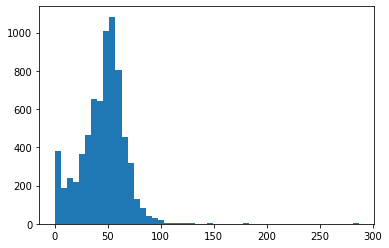

In [45]:
plt.hist([len(s) for s in tokenized], bins=50)
plt.show()

In [46]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized, size = 100, window = 10, min_count = 5, workers = 4, sg = 1)

In [47]:
model.wv.vectors.shape

(4266, 100)

In [48]:
print(model.wv.most_similar('아기'))

[('개월', 0.8216731548309326), ('베이비', 0.8020554780960083), ('청양', 0.7687114477157593), ('31', 0.7682582139968872), ('애기', 0.7621430158615112), ('베베', 0.7561869621276855), ('33', 0.7550663948059082), ('연년생', 0.7516469955444336), ('황금', 0.7513975501060486), ('kids', 0.750623345375061)]


In [49]:
t = '아기'
model.wv.most_similar(t,topn=10)

[('개월', 0.8216731548309326),
 ('베이비', 0.8020554780960083),
 ('청양', 0.7687114477157593),
 ('31', 0.7682582139968872),
 ('애기', 0.7621430158615112),
 ('베베', 0.7561869621276855),
 ('33', 0.7550663948059082),
 ('연년생', 0.7516469955444336),
 ('황금', 0.7513975501060486),
 ('kids', 0.750623345375061)]

In [50]:
df2 = pd.DataFrame(model.wv.most_similar(t,topn=10), columns = ['Token', 'Similarity'])
alpha = 0.3
df2['transition_probability'] = df2['Similarity'] * alpha
df2

Token  Similarity  transition_probability
0    개월    0.821673                0.246502
1   베이비    0.802055                0.240617
2    청양    0.768711                0.230613
3    31    0.768258                0.230477
4    애기    0.762143                0.228643
5    베베    0.756187                0.226856
6    33    0.755066                0.226520
7   연년생    0.751647                0.225494
8    황금    0.751398                0.225419
9  kids    0.750623                0.225187

In [51]:
print(model.wv.most_similar('아들'))

[('형제', 0.8418751955032349), ('고슴도치', 0.8236270546913147), ('왕자', 0.8183688521385193), ('바보', 0.8122718334197998), ('instakids', 0.8096888065338135), ('말띠', 0.8078591823577881), ('원숭이띠', 0.8067766427993774), ('닭띠', 0.8048343658447266), ('연년생', 0.802126407623291), ('독박', 0.8017171621322632)]


In [17]:
tkn_cnt = 0
t = '아들'
total = len(tokenized)
for i in range(total):
    if t in tokenized[i]:
        tkn_cnt += 1
p_t_curr = tkn_cnt / total

p_next_list = []
exp_cnt = 0
for i in range(total):
    p_list = []
    for j in range(len(tokenized[i])):
        cnt = 0
        
        for k in range(total):
            if t + tokenized[i][j] in hashtag_list[k]:
                cnt += 1
        p_list.append((cnt/total) / p_t_curr)
    p_next_list.append(p_list)


In [18]:
print(p_next_list[:5])
print(len(p_next_list))

[[0.0, 0.007194244604316547, 0.0, 0.02158273381294964, 0.02158273381294964, 0.4772182254196643, 0.0, 0.0, 0.0, 0.0, 0.02158273381294964, 0.5155875299760192, 0.02877697841726619, 0.02158273381294964, 0.0023980815347721825, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4772182254196643, 0.0, 0.4772182254196643, 0.0, 0.4772182254196643, 0.0, 0.4772182254196643, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023980815347721825, 0.0, 0.0, 0.02158273381294964, 0.007194244604316547, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016786570743405275, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007194244604316547, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4772182254196643, 0.0, 0.004796163069544365, 0.4772182254196643, 0.0, 0.0, 0.4772182254196643, 0.0, 0.0, 0.0, 0.4772182254196643, 0.0, 0.0, 0.0, 0.0, 0.02158273381294964, 0.0023980815347721825, 0.02158273381294964, 0.0023980815347721825, 0.0, 0.0, 0.02158273381294964], [0.0, 0.0, 0.0, 0.0

In [19]:
able = []
for i in range(total):
    for j in range(len(tokenized[i])):
        if p_next_list[i][j] > 0.01:
            able.append(tokenized[i][j])
print(set(able))

{'램', '육아', '래미', '스', '바보', '바', '옷', '래', '맘', '스타', '그', '육', '그램', '둘'}


중복 토큰 삭제  
전환, 확장

In [120]:
# 필요 - 태그들이 쭉 있는 str, 토큰들이 있는 리스트, 

def TagExpansion(data, tkn, alpha, pivot):    

    # 토큰들이 들어있는 리스트?
#     tokenized = []
#     for sentence in hashtag_joined:
#         tokens = mecab.morphs(sentence)
#         tokenized.append(tokens)
    
    probs = getCondtnlProb(data, tokenized, tkn, pivot)
    if len(probs) == 0:
        return [tkn]

    

    probs2 = []
    for t in probs:
        probs2.append(getCondtnlProb(data, tokenized, t[0], pivot/alpha))
        
    probs3 = []
    for t in probs2:
        if len(t) == 0:
            probs3.append([])
        else:
            temp = []
            for i in range(len(t)):
                temp.append(getCondtnlProb(data, tokenized, t[i][0], pivot/(alpha**2)))
        probs3.append(temp)
    
    
    
    hashtag = [tkn+probs[k][0] for k in range(len(probs)) ]
    tag=[]
    for i in range(len(hashtag)):
        for j in range(len(probs2[i])):
            hashtag.append(hashtag[i]+probs2[i][j][0])
    
    return probs, probs2, probs3, hashtag


In [70]:
# 조건부 확률을 돌려주는 함수?
def getCondtnlProb(data, tokenized_tags, tkn, pivot):
    ret = []
    # 기준 토큰 등장 확률
    tkn_cnt = 0
    total = len(tokenized_tags)
    idxs = []
    next_tkn = []
    for i in range(total):
        for j in range(len(tokenized_tags[i])):
            if tokenized_tags[i][j] == tkn:
                tkn_cnt += 1
                idxs.append([i,j])
                if j+1 < len(tokenized_tags[i]):
                    next_tkn.append(tokenized_tags[i][j+1])

    p_cur = tkn_cnt / total
    
    ### 코드 변경
    p_nexts = []
    next_cnt = 0
    # t: 토큰셋
    t = list(set(next_tkn))
    for i in range(len(t)):
        cnt = 0
        for idx in idxs:
            if idx[1]+1 < len(tokenized_tags[idx[0]]) and tokenized_tags[idx[0]][idx[1]+1] == t[i]:
                cnt += 1
        p_nexts.append([t[i],(cnt/total) / p_cur])
    
    for i in range(len(p_nexts)):
        if p_nexts[i][1] > pivot:
            if p_nexts[i][0] == tkn:
                continue
            ret.append(p_nexts[i])
    
    return ret

In [125]:
TagExpansion(df, '아들', 0.7, 0.1)

([['스타', 0.27695351137487634], ['맘', 0.26409495548961426]],
 [[['그램', 0.9130764052507574]], []],
 [[[]], [], [[]]],
 ['아들스타', '아들맘', '아들스타그램'])

In [131]:
TagExpansion(df, '아들', 0.7, 0.2)

([['스타', 0.2770618556701031], ['맘', 0.2719072164948454]], ['스타', '맘'])